In [1]:
import tensorflow as tf

/Users/sdeabhi/Desktop/ai/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


'2.20.0'

In [4]:
mnist = tf.keras.datasets.mnist  # dataset of images of hand written digits in 28 * 28

In [6]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


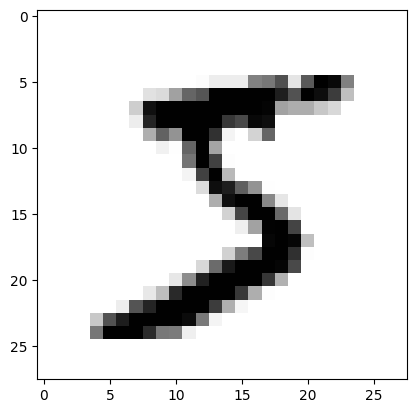

In [10]:
import matplotlib.pyplot as plt


plt.imshow(xtrain[0], cmap= plt.cm.binary)

In [8]:
print(xtrain[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [23]:
xtrain = tf.keras.utils.normalize(xtrain, axis=1)
xtest = tf.keras.utils.normalize(xtest, axis=1)

In [24]:
print(xtrain[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

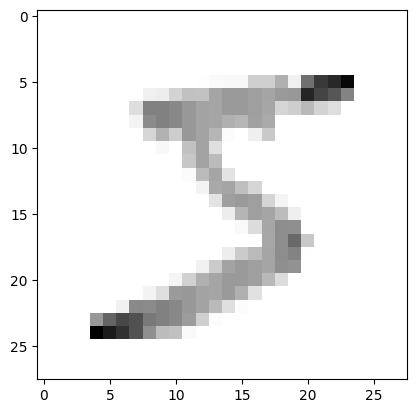

In [25]:
plt.imshow(xtrain[0], cmap = plt.cm.binary)

In [33]:
model = tf.keras.models.Sequential()

# it makes multi dimensional to single dimension 
model.add(tf.keras.layers.Flatten()) 

# add no of neurons and what is the activation which will give the value
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.8693 - loss: 0.4739
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.9643 - loss: 0.1160
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.9768 - loss: 0.0751
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.9828 - loss: 0.0529
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.9870 - loss: 0.0388


In [34]:
validation_loss, validation_accuracy = model.evaluate(xtest, ytest)
print(validation_loss, validation_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.9693 - loss: 0.1033
0.08458555489778519 0.9747999906539917


In [39]:
model.save('basic_nn.h5')

In [45]:
from tensorflow.keras.activations import softmax

basic_model = tf.keras.models.load_model(
    'basic_nn.h5',
    custom_objects={'softmax_v2': softmax}
)

In [49]:
predict = basic_model.predict([xtest])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step


/Users/sdeabhi/Desktop/ai/venv/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)
/Users/sdeabhi/Desktop/ai/venv/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


In [50]:
print(predict)

[[4.83123003e-12 7.96814698e-12 1.80561219e-08 ... 9.99999523e-01
  7.34870877e-13 9.77501080e-10]
 [1.81087340e-10 2.72709149e-05 9.99972761e-01 ... 2.54738258e-10
  8.30252866e-10 2.35055074e-12]
 [1.81045650e-08 9.99957025e-01 7.68878908e-06 ... 2.58152868e-05
  2.21417872e-06 6.47466658e-09]
 ...
 [1.48467044e-10 7.79193599e-09 7.14634174e-09 ... 2.50125777e-06
  5.30728030e-08 7.91703133e-06]
 [2.14733717e-07 1.35693170e-07 5.77945762e-08 ... 2.75566254e-06
  5.32315695e-04 4.99872310e-10]
 [1.15896796e-07 5.87626587e-08 6.78394190e-06 ... 6.24672447e-09
  3.90915147e-06 1.18845461e-10]]


7


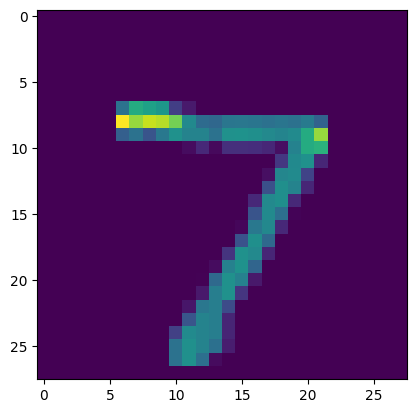

In [64]:
import numpy as np


print(np.argmax(predict[0]))
plt.imshow(xtest[0])

AxesImage(shape=(28, 28)) 5


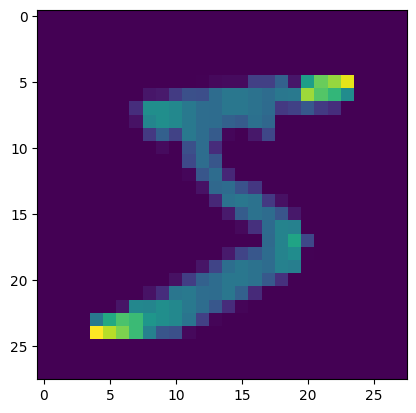

In [61]:
print(plt.imshow(xtrain[0]), ytrain[0])